# Importing Necessary Libraries

In [1]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

# ignoring warnings
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
dataset_path = "/kaggle/input/data-science-salaries-2023/ds_salaries.csv"

try:
    df = pd.read_csv(dataset_path)
    print(f"Dataset loaded successfully from {dataset_path}")
except FileNotFoundError:
    print("Error: Dataset file not found. Please provide the correct file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully from /kaggle/input/data-science-salaries-2023/ds_salaries.csv


# General Data Exploration

In [3]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [4]:
df.shape

(3755, 11)

In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [7]:
df.isnull().sum() # There are no null values in the dataset, good thing

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


# EDA

In [9]:
df['job_title'].value_counts() # wide variety of titles, must be groupped in preprocessing step

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

[Text(0.5, 1.0, 'Salary Distribution By Company Size')]

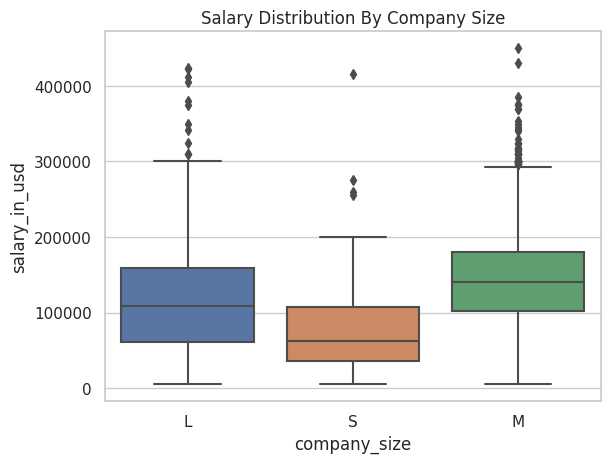

In [10]:
# Boxplot shows us there are few outliers in the dataset

sns.set(style='whitegrid')

sns.boxplot(x='company_size', y='salary_in_usd', data=df).set(title='Salary Distribution By Company Size')

# Looks like medium sized companies pay more

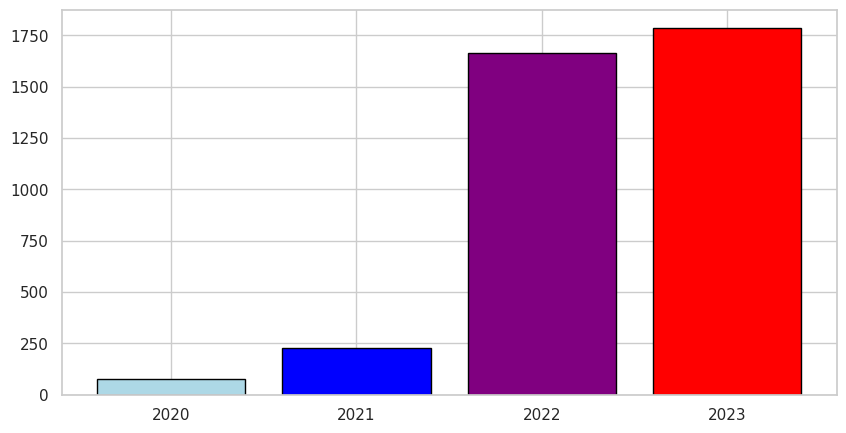

In [11]:
# Bar chart representing the number of individuals for each year

work_year_counts = df['work_year'].value_counts()

work_year_counts_sorted = work_year_counts.sort_index()

color = ['lightblue', 'blue', 'purple', 'red']

plt.figure(figsize=(10, 5))

plt.bar(x=work_year_counts_sorted.index.astype(str), height=work_year_counts_sorted.values, data=df,
        color=color,
        edgecolor='black',
        linewidth=1)

plt.xlabel = 'Years'
plt.ylabel = 'Number of Individuals'
plt.title = 'Distribution of Individuals by Years of Work Experience'

plt.show()

In [12]:
# There is a notable correlation between experience level and average salaries

mean_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

fig = px.bar(mean_salary_by_experience, x='experience_level', y='salary_in_usd',
                   labels={'experience_level': 'Experience Level', 'salary_in_usd': 'Mean Salary (USD)'},
                   title='Mean Salary Distribution by Experience Level',
             category_orders ={'experience_level':['EN', 'MI', 'SE', 'EX']})

fig.show()

[Text(0, 0, 'On-Site'), Text(1, 0, 'Remote'), Text(2, 0, 'Hybrid')]

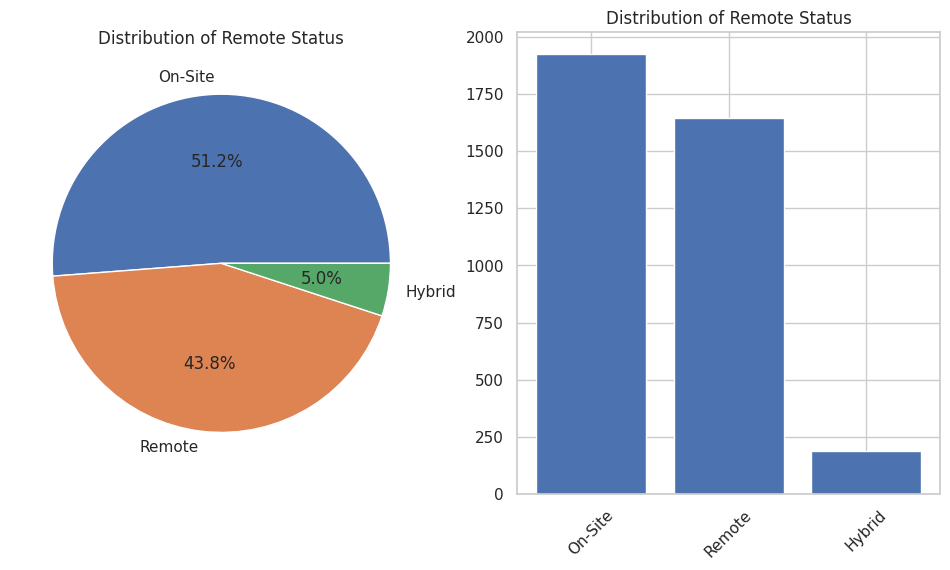

In [13]:
# Very few hybird workers, will be combined with remote workers

remote_status = df['remote_ratio'].replace({0:'On-Site', 50:'Hybrid', 100:'Remote'})

remote_status_counts = remote_status.value_counts()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=False)

# Pie Plot
ax[0].pie(remote_status_counts.values, labels=remote_status_counts.index.astype(str), autopct='%1.1f%%')
ax[0].set_title('Distribution of Remote Status')

# Bar plot
ax[1].bar(x=remote_status_counts.index, height=remote_status_counts.values)
ax[1].set_title('Distribution of Remote Status')

ax[1].set_xticklabels(remote_status_counts.index.astype(str), rotation=45)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [15]:
df['employment_type'].value_counts() # High domination of full-time workers

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

In [16]:
country_counts = df['company_location'].value_counts()

# Get the top 10 countries
top_10_countries = country_counts.head(10)

fig = px.bar(x=top_10_countries.index.astype(str), y=top_10_countries.values,
             labels={'x': 'Country Code', 'y': 'Workers'})
fig.update_layout(title='Top 10 Countries of Companies')

fig.show()

# Almost every company from US, will be categorized as US-other countries

# Preprocessing

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [18]:
# Dropping unnecessary columns

df = df.drop(['salary', 'salary_currency', 'employee_residence'], axis=1)

## Remove Outliers

In [19]:
def remove_outliers_from_salary(df, threshold=1.5):
    Q1 = df['salary_in_usd'].quantile(0.25) # First quartile
    Q3 = df['salary_in_usd'].quantile(0.75) # Third quartile
    
    # Calculate IQR for the salary column
    IQR = Q3 - Q1
    
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Identify outliers in the salary column
    outliers = (df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)
    
    # Remove outlier rows from the DataFrame
    df_filtered = df[~outliers]
    
    return df_filtered

In [20]:
df = remove_outliers_from_salary(df)

## Handling Categorical Data

In [21]:
# Encoded the 'US' as 1 and 0 for others
df['company_location'] = df['company_location'].map(lambda x: 1 if x == 'US' else 0)

In [22]:
# Encoded the experience level column
df['experience_level'] = df['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})

In [23]:
# Only keep full-time workers' data

df = df[df['employment_type'] == 'FT']

df = df.drop(['employment_type'], axis=1) # Since there is only one employment type we drop the columns

In [24]:
# Encoded the company size column

df['company_size'] = df['company_size'].map({'S': 0, 'M': 1, 'L': 2})

In [25]:
# Encoded the work year column as 2023 for the year 2023, and as 2022 for all other years

df['work_year'] = df['work_year'].map(lambda x: 2023 if x == 2023 else 2022)

In [26]:
# Too many job titles, they must be grouped under more general titles

def group_job_title(df):
    job_title_classified = []
    for title in df['job_title']:
        if 'lead' in title.lower() or 'head' in title.lower() or 'director' in title.lower():
            job_title_classified.append('Lead')
        elif 'manager' in title.lower():
            job_title_classified.append('Manager')
        elif 'scientist' in title.lower():
            job_title_classified.append('Data Scientist')
        elif 'analyst' in title.lower():
            job_title_classified.append('Data Analyst')
        elif 'engineer' in title.lower():
            job_title_classified.append('Data Engineer')
        elif 'architect' in title.lower():
            job_title_classified.append('Data Architect')
        elif 'developer' in title.lower() or 'technician' in title.lower() or 'programmer' in title.lower():
            job_title_classified.append('Developer')
        elif 'researcher' in title.lower():
            job_title_classified.append('Data Researcher')
        elif 'consultant' in title.lower():
            job_title_classified.append('Consultant')
        else:
            job_title_classified.append('Other')
    
    df['job_title_classified'] = job_title_classified
            
group_job_title(df)

df['job_title_classified'].value_counts()

job_title_classified
Data Engineer      1593
Data Scientist     1023
Data Analyst        669
Manager             106
Data Architect      103
Lead                 63
Developer            44
Consultant           25
Other                21
Data Researcher       9
Name: count, dtype: int64

In [27]:
# Job titles by average salary

mean_salary_by_job_title = df.groupby('job_title_classified')['salary_in_usd'].mean().sort_values(ascending=False)

fig = px.bar(df, x=mean_salary_by_job_title.index, y=mean_salary_by_job_title.values)

fig.show()

In [28]:
df = df.drop(['job_title'], axis=1) # No need that column anymore

df.head()

,work_year,experience_level,salary_in_usd,remote_ratio,company_location,company_size,job_title_classified
0,2023,2,85847,100,0,2,Data Scientist
3,2023,2,175000,100,0,1,Data Scientist
4,2023,2,120000,100,0,1,Data Scientist
5,2023,2,222200,0,1,2,Data Scientist
6,2023,2,136000,0,1,2,Data Scientist


In [29]:
# Job title classified column encoding

encoder = OrdinalEncoder().set_output(transform="pandas")

df['job_title_classified'] = encoder.fit_transform(df[['job_title_classified']])

df.head()

,work_year,experience_level,salary_in_usd,remote_ratio,company_location,company_size,job_title_classified
0,2023,2,85847,100,0,2,5.0
3,2023,2,175000,100,0,1,5.0
4,2023,2,120000,100,0,1,5.0
5,2023,2,222200,0,1,2,5.0
6,2023,2,136000,0,1,2,5.0


# Split Data and Scale

In [30]:
X = df.drop(['salary_in_usd'], axis=1)
y = df[['salary_in_usd']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=False, random_state=31)

In [32]:
# Scaling by StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

## Linear Regression

In [33]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [34]:
lr_pred = lin_reg.predict(X_test)

In [35]:
# MAE and R2 scores

print(mean_absolute_error(y_test, lr_pred))
print(np.sqrt(mean_squared_error(y_test, lr_pred)))

33179.9915647159
42401.53500336767


## Ridge

In [36]:
rr = Ridge()

# Grid search for best hyperparams

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=31)
grid_space = dict()

grid_space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
grid_space['fit_intercept'] = [True, False]
grid_space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

grid_search = GridSearchCV(rr, grid_space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

grid_result = grid_search.fit(X_train, y_train)

print(grid_result.best_score_)
print(grid_result.best_params_)

-37200.83582705523
{'alpha': 1e-05, 'fit_intercept': True, 'solver': 'lsqr'}


In [37]:
rr_best = Ridge(alpha=1e-05, fit_intercept=True, solver='lsqr')

rr_best.fit(X_train, y_train)

Ridge(alpha=1e-05, solver='lsqr')

In [38]:
rr_pred = rr_best.predict(X_test)

In [39]:
print(mean_absolute_error(y_test, rr_pred))
print(np.sqrt(mean_squared_error(y_test, rr_pred)))

33179.93388413461
42401.52004907305


## Lasso

In [40]:
las_reg = Lasso()

# Grid search for best hyperparams

grid_space_las = dict()

grid_space_las['fit_intercept'] = [True, False]
grid_space_las['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

grid_search_las = GridSearchCV(las_reg, grid_space_las, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

grid_result_las = grid_search_las.fit(X_train, y_train)

print(grid_result_las.best_score_) # Tiny worse than ridge
print(grid_result_las.best_params_)

-37200.92546547005
{'alpha': 1e-05, 'fit_intercept': True}


In [41]:
las_reg_best = Lasso(alpha=1e-5, fit_intercept=True)

las_reg_best.fit(X_train, y_train)

Lasso(alpha=1e-05)

In [42]:
las_reg_pred = las_reg_best.predict(X_test)

In [43]:
print(mean_absolute_error(y_test, las_reg_pred))
print(np.sqrt(mean_squared_error(y_test, las_reg_pred)))

33179.99156731675
42401.53500535977


## Elastic Net

In [44]:
en_reg = ElasticNet()

# Grid search for best hyperparams

grid_space_en = dict()

grid_space_en['l1_ratio'] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
grid_space_en['fit_intercept'] = [True, False]
grid_space_en['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

grid_search_en = GridSearchCV(en_reg, grid_space_en, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

grid_result_en = grid_search_en.fit(X_train, y_train)

print(grid_result_en.best_score_) # as expected, best l1_ratio is the highest since ridge is better
print(grid_result_en.best_params_)

-37200.9262002962
{'alpha': 1e-05, 'fit_intercept': True, 'l1_ratio': 0.9}


In [45]:
en_reg_best = ElasticNet(alpha=1e-5, l1_ratio=0.9, fit_intercept=True)

en_reg_best.fit(X_train, y_train)

ElasticNet(alpha=1e-05, l1_ratio=0.9)

In [46]:
en_reg_pred = en_reg_best.predict(X_test)

In [47]:
print(mean_absolute_error(y_test, en_reg_pred))
print(np.sqrt(mean_squared_error(y_test, en_reg_pred)))

33179.995021307834
42401.53671237104


## Random Forest

In [48]:
rf_reg = RandomForestRegressor()

# Grid search for best hyperparams

grid_space_rf = dict()

grid_space_rf['n_estimators'] = [50, 100, 200, 300, 400]
grid_space_rf['bootstrap'] = [True, False]
grid_space_rf['max_depth'] = [5, 10, 15]
grid_space_rf['max_leaf_nodes'] = [3, 6, 9]

grid_search_rf = GridSearchCV(rf_reg, grid_space_rf, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

# Convert y into a 1-d array
y_train_1d = y_train.values.ravel()

grid_result_rf = grid_search_rf.fit(X_train, y_train_1d)

print(grid_result_rf.best_score_)
print(grid_result_rf.best_params_)

-36266.46939672604
{'bootstrap': True, 'max_depth': 15, 'max_leaf_nodes': 9, 'n_estimators': 50}


In [49]:
rf_reg_best = RandomForestRegressor(n_estimators=50, max_depth=5, max_leaf_nodes=9, bootstrap=True)

rf_reg_best.fit(X_train, y_train_1d)

RandomForestRegressor(max_depth=5, max_leaf_nodes=9, n_estimators=50)

In [50]:
rf_reg_pred = rf_reg_best.predict(X_test)

In [51]:
print(mean_absolute_error(y_test, rf_reg_pred))
print(np.sqrt(mean_squared_error(y_test, rf_reg_pred)))

33291.09338733592
42907.10940915289
